<a href="https://colab.research.google.com/github/omars1234/DeepLearning_RNN/blob/main/NLP_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import nltk
from nltk import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns

In [2]:
df=pd.read_csv(r"/content/file10000.csv")
df.head()


,Unnamed: 0,review,sentiment
0,0,One of the other reviewers has mentioned that ...,positive
1,1,A wonderful little production. <br /><br />The...,positive
2,2,I thought this was a wonderful way to spend ti...,positive
3,3,Basically there's a family where a little boy ...,negative
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df=df[["review","sentiment"]]

In [4]:
df["sentiment"].value_counts()

,count
sentiment,
positive,5028
negative,4972


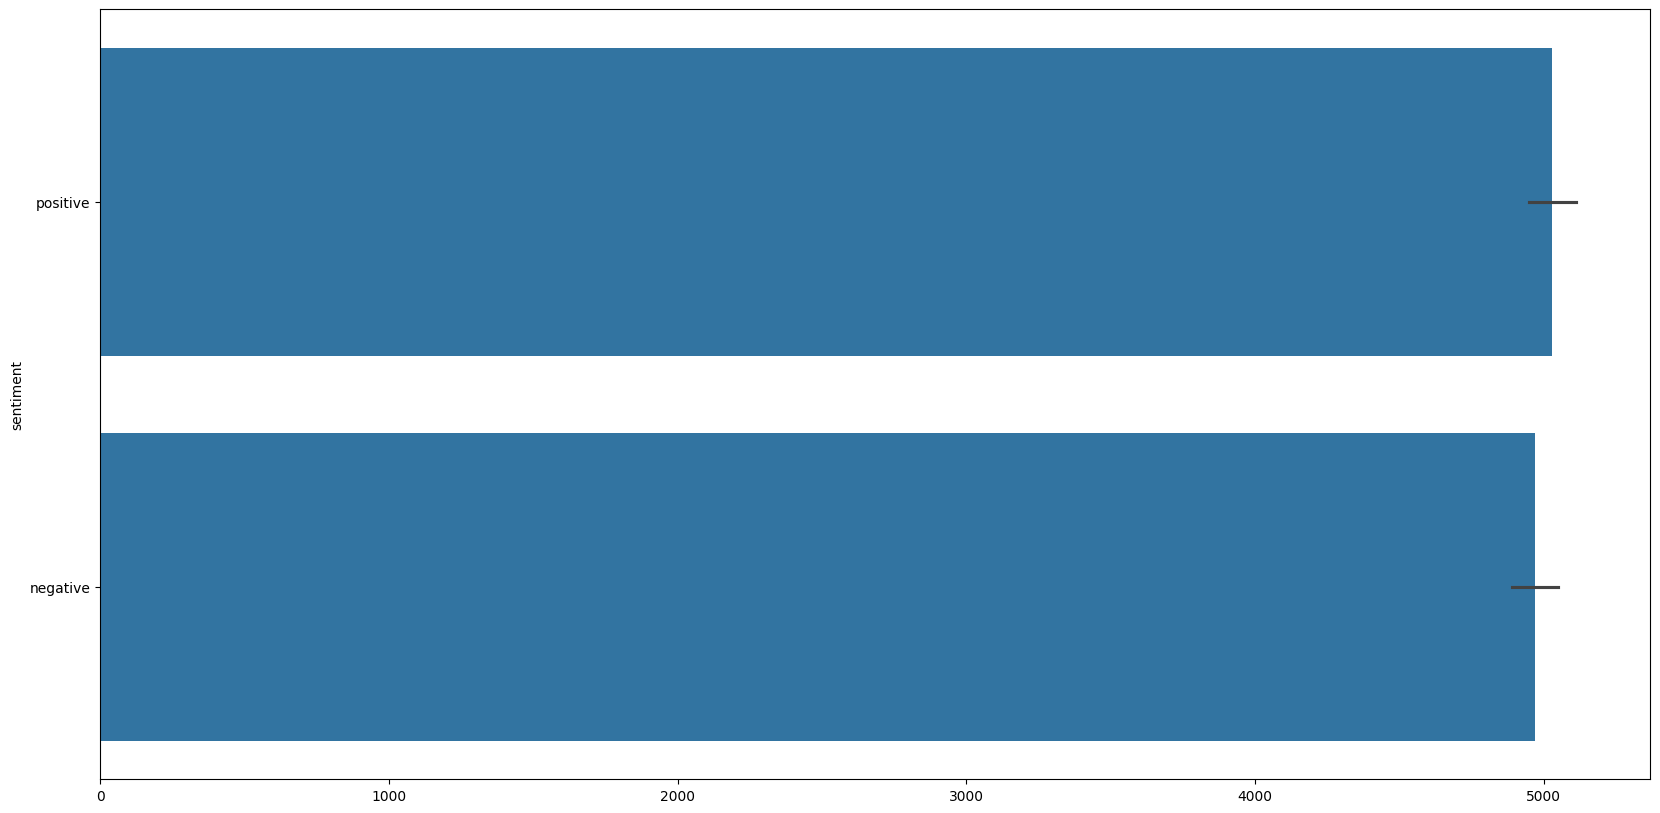

In [5]:
sns.barplot(df["sentiment"]);

In [6]:
sentence_steaming=PorterStemmer()

In [11]:
!pip install nltk

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import  stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
import re
from tqdm import tqdm
curpos=[]
for i  in tqdm(range(0,len(df))):
    review=re.sub("[^a-zA-Z]"," ",df["review"][i])
    review=review.lower()
    review=review.split()
    review=[sentence_steaming.stem(word) for word in review if not word in stopwords.words("english")]
    review=" ".join(review)
    curpos.append(review)

100%|██████████| 10000/10000 [04:33<00:00, 36.50it/s]


In [17]:
len(curpos)

10000

In [18]:
df["sentiment"].shape

(10000,)

In [19]:
! pip install tensorflow

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding,Bidirectional,SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words=50000
max_len=200
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(curpos)
sequences=tokenizer.texts_to_sequences(curpos)
sequences_matrix=pad_sequences(sequences,maxlen=max_len)

In [30]:
y=pd.get_dummies(df["sentiment"])
y=y.applymap(lambda x:1 if x is True else 0 )
y=y.iloc[:,1].values

<ipython-input-30-ec7f4a88fb35>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y=y.applymap(lambda x:1 if x is True else 0 )


In [31]:
len(sequences_matrix)

10000

In [32]:
x=sequences_matrix
y=y

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((7500, 200), (2500, 200), (7500,), (2500,))

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding,Bidirectional,SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop

In [35]:
model=Sequential()
model.add(Embedding(max_words,100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=.2))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
#model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [38]:
history=model.fit(xtrain,ytrain,validation_split=.2,epochs=100,batch_size=128,callbacks=early_stopping)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 355ms/step - accuracy: 0.9826 - loss: 0.0591 - val_accuracy: 0.8400 - val_loss: 0.4937
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 389ms/step - accuracy: 0.9880 - loss: 0.0443 - val_accuracy: 0.8307 - val_loss: 0.5908
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 414ms/step - accuracy: 0.9928 - loss: 0.0318 - val_accuracy: 0.8253 - val_loss: 0.5953
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 401ms/step - accuracy: 0.9891 - loss: 0.0366 - val_accuracy: 0.8253 - val_loss: 0.6207
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 364ms/step - accuracy: 0.9936 - loss: 0.0210 - val_accuracy: 0.8360 - val_loss: 0.6696
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 353ms/step - accuracy: 0.9935 - loss: 0.0224 - val_accuracy: 0.8033 - val_loss: 0.6409
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 356ms/step - accuracy: 0.9893 - loss: 0.0372 - val_accuracy: 0.8113 - val_loss: 0.6558
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 361ms/step - accuracy: 0.9985 - loss: 0.0103 - 

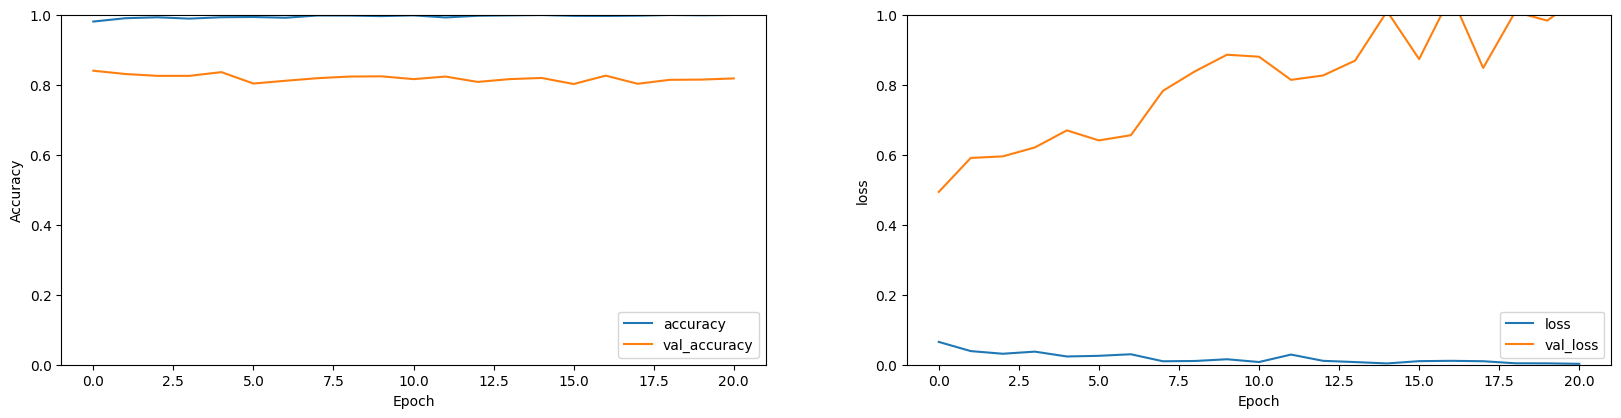

In [39]:
plt.subplot(221)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

plt.subplot(222)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [40]:
model.evaluate(xtest,ytest)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.8239 - loss: 1.0482


[1.0661613941192627, 0.8176000118255615]

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_predict=model.predict(xtest)
y_predict=np.where(y_predict>.5,1,0)
print(classification_report(ytest,y_predict))

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1220
           1       0.84      0.80      0.82      1280

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500



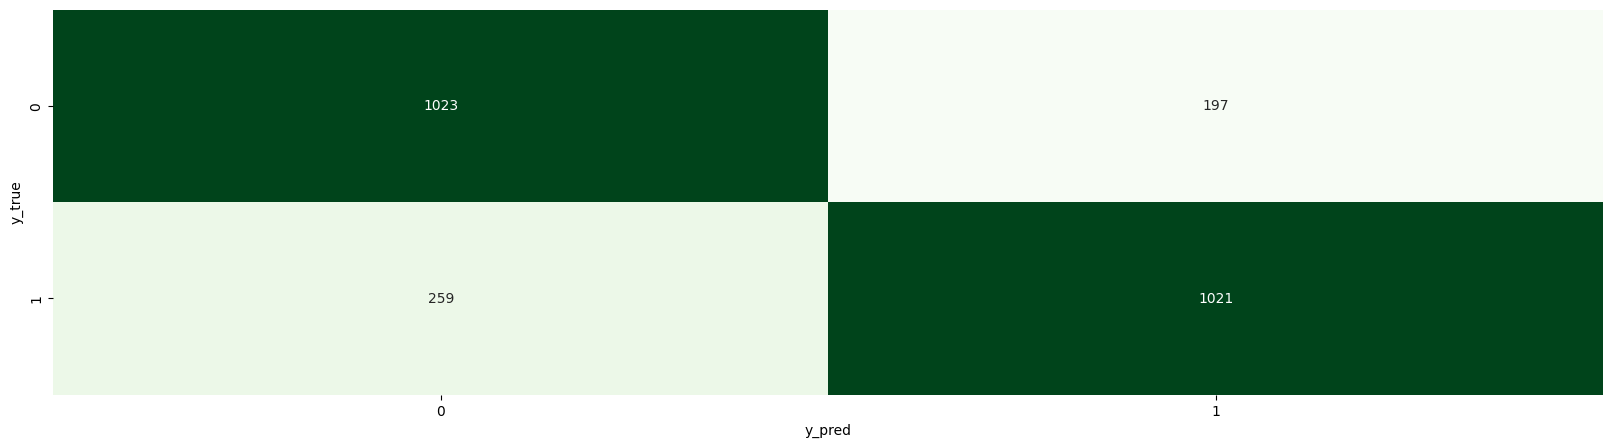

In [44]:
matplotlib.rcParams["figure.figsize"]=(20,5)
sns.heatmap(confusion_matrix(ytest,y_predict),annot = True,cmap="Greens", fmt = ".0f",cbar=False)
plt.xlabel("y_pred")
plt.ylabel("y_true");